In [1]:
import cv2
import os
from PIL import Image
import glob
import numpy as np
from tqdm import tqdm

In [ ]:
## Renaming all the files with a prefix image and suffix as number
path="C:\\Users\\sinkur\\Documents\\rule9"
i=0
for filename in os.listdir(path):
    pre,ext= os.path.splitext(filename)
    os.rename(filename, "C:\\Users\\sinkur\\Documents\\Consulting\\NHA\\rule9\\"+'image'+"_"+str(i)+ext)
    i = i +1

In [ ]:
i=0
for filename in os.listdir("C:\\Users\\sinkur\\Documents\\rule9\\"):
    pre,ext= os.path.splitext(filename)
    os.rename(filename, "C:\\Users\\sinkur\\Documents\\Consulting\\NHA\\rule9\\Documents\\"+"capture"+"_"+ str(i)+ext)
    i = i +1

#converting all the png files into jpg
for file in glob.glob("C:\\Users\\sinkur\\Documents\\Consulting\\NHA\\rule9\\Documents\\*.png"):
    im = Image.open(file)
    rgb_im = im.convert('RGB')
    rgb_im.save(file.replace("png", "jpg"))

#Remove png files
for file in glob.glob("C:\\Users\\sinkur\\Documents\\Consulting\\NHA\\rule9\\Documents\\*.png"):
    os.remove(file)

for file in glob.glob("*.png"):
    os.remove(file)

for file in os.listdir(): 
    Image.open(file).convert('L')

def resize_image(path): 
    for file in os.listdir(path):  
        im = cv2.imread(path+ "/"+file)
        im=cv2.resize(im,(150,150),interpolation = cv2.INTER_AREA)
        im.save()
        print(im.shape)

resize_image("C:/Users/sinkur/Documents/Consulting/NHA/rule9/train/rule9")
resize_image("C:/Users/sinkur/Documents/Consulting/NHA/rule9/train/Nonrule9")
resize_image("C:/Users/sinkur/Documents/Consulting/NHA/rule9/test/Nonrule9")
resize_image("C:/Users/sinkur/Documents/Consulting/NHA/rule9/test/rule9")

import shutil
files=os.listdir()

for f in files[1:239]:
    shutil.copy(f, 'C:\\Users\\sinkur\\Documents\\Consulting\\NHA\\rule9\\train')

for f in files[240:]:
    shutil.copy(f, 'C:\\Users\\sinkur\\Documents\\Consulting\\NHA\\rule9\\test')

In [2]:
# Setting the directory

X=[]
y=[]
IMG_SIZE=150
kneedirtrain='C:/Users/sinkur/Documents/Consulting/NHA/Ortho/Usecase_set/Knee/Train/Knee'
kneeimplanttrain_DIR='C:/Users/sinkur/Documents/Consulting/NHA/Ortho/Usecase_set/Knee/Train/Implant'
kneetest_DIR='C:/Users/sinkur/Documents/Consulting/NHA/Ortho/Usecase_set/Knee/Test/Knee'
kneeimplanttest_DIR='C:/Users/sinkur/Documents/Consulting/NHA/Ortho/Usecase_set/Knee/Test/Implant'



In [3]:
def assign_label(img,label):
    return label

def make_train_data(label,Dir):
    for img in tqdm(os.listdir(Dir)):
        label=assign_label(img,label)
        path = os.path.join(Dir,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        X.append(np.array(img))
        y.append(str(label))

make_train_data('knee',kneedirtrain)
print(len(X))
make_train_data('knee',kneetest_DIR)
print(len(X))
make_train_data('knee_implant',kneeimplanttrain_DIR)
print(len(X))
make_train_data('knee_implant',kneeimplanttest_DIR)
print(len(X))



 24%|██▍       | 81/340 [00:00<00:00, 801.06it/s]

144
186


100%|██████████| 77/77 [00:00<00:00, 868.35it/s]

526
603


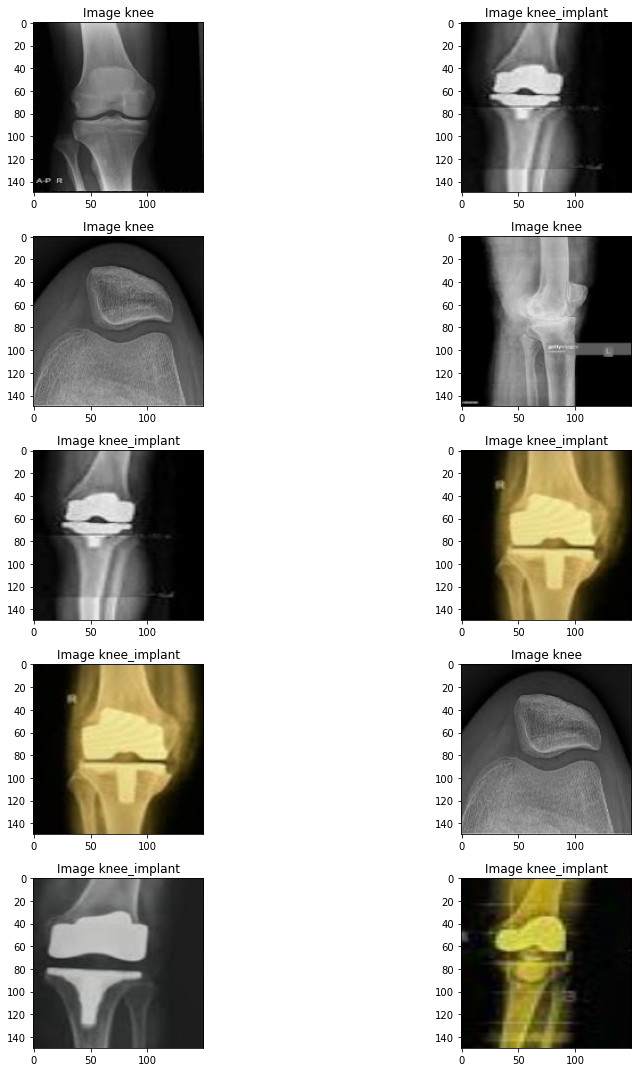

In [20]:
#Visualizing
import matplotlib.pyplot as plt
import random as rn

fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(y))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Image '+y[l])
        
plt.tight_layout()






In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization


le=LabelEncoder()
Y=le.fit_transform(y)
Y=to_categorical(Y,2)
X=np.array(X)
X=X/255

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
np.random.seed(42)


model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))




model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))



model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))



model.add(Flatten())
model.add(Dense(512))
model.add(Dropout(rate=0.25))
model.add(Activation('relu'))
model.add(Dense(2, activation = "softmax"))


Using TensorFlow backend.
C:\Users\sinkur\Anaconda3\envs\ml1\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\sinkur\Anaconda3\envs\ml1\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\sinkur\Anaconda3\envs\ml1\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\sinkur\Anaconda3\envs\ml1\lib\site-packag

Instructions for updating:
Colocations handled automatically by placer.


In [7]:

batch_size=32
epochs=50

from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint
red_lr= ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.1)
model_checkpoint_callback = ModelCheckpoint(filepath="C:/Users/sinkur/Documents/Consulting/NHA/Ortho/Usecase_set/Knee/knee.h5",save_weights_only=False,monitor='val_accuracy',mode='max',
    save_best_only=True,verbose=1)

mycallbacks=[model_checkpoint_callback]

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

model.summary()

model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size,callbacks
                              =mycallbacks)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 96)       

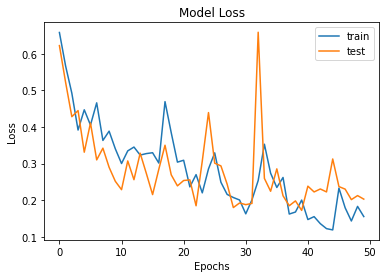

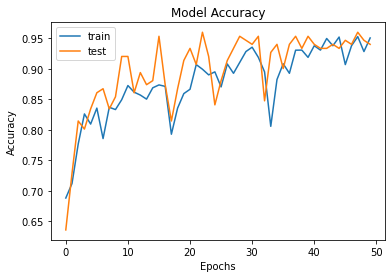

In [8]:
#Plot:: Training_Loss Vs Validaion_Loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

#Plot:: Training_Accuracy Vs Validaion_Accuracy
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [9]:
from keras.models import load_model
modelx= load_model("C:/Users/sinkur/Documents/Consulting/NHA/Ortho/Usecase_set/Knee/knee.h5")
pred=modelx.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

preds=np.round(pred,0)

lab=["knee","knee_implant"]



# import pandas as pd
# categorical_test_labels = pd.DataFrame(y_test).idxmax(axis=1)
# categorical_preds = pd.DataFrame(preds).idxmax(axis=1) #columnwise indices for maximum value
# confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)



In [11]:
import pandas as pd
classification_metrics= classification_report(y_test,preds,target_names=lab,output_dict=True)
df= pd.DataFrame(classification_metrics).transpose()
df.style.format({'precision': "{:.2%}",'recall': "{:.2%}",'f1-score': "{:.2%}",'support': "{:.0f}"})

,precision,recall,f1-score,support
knee,94.55%,94.55%,94.55%,55
knee_implant,96.88%,96.88%,96.88%,96
micro avg,96.03%,96.03%,96.03%,151
macro avg,95.71%,95.71%,95.71%,151
weighted avg,96.03%,96.03%,96.03%,151
samples avg,96.03%,96.03%,96.03%,151


In [59]:
#Final_test
z=[]
IMG_SIZE=150
Dir="C:/Users/sinkur/Documents/Consulting/NHA/Ortho/Usecase_set/Knee/newtest"
for img in tqdm(os.listdir(Dir)):
        path = os.path.join(Dir,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        z.append(np.array(img))

img_ids= pd.DataFrame(os.listdir(Dir),columns=["Image_id"])     
pred_z= modelx.predict(np.array(z))
pred_digits_z=np.argmax(pred,axis=1)
preds_z=np.round(pred_z,0)
categorical_preds_z = pd.DataFrame(preds_z).idxmax(axis=1)

Pred_images= pd.concat([img_ids,categorical_preds_z],axis=1)
Pred_images.columns=["Image_id","Predict"]

display(HTML(Pred_images.to_html()))
Pred_images.to_html()
Pred_images.dtypes

100%|██████████| 12/12 [00:00<00:00, 225.77it/s]


,Image_id,Predict
0,download (17).jpg,0
1,download.jpg,1
2,figure3.jpg,1
3,i4.JPG,1
4,images (2).jpg,0
5,images.jpg,0
6,Knee Prostheses Bicompartmental Smith _ Nephew Deuce (Implant 804).jpg,1
7,Knee Prostheses BicompartmentalSmith _ Nephew Deuce (Implant 805).jpg,1
8,Knee Prostheses Patellofemoral Centerpulse PFJ (Implant 167).jpg,1
9,Knee Prostheses Unicompartmental Interpositional Howmedica EIUS (Implant 12).jpg,0


Image_id    object
Predict      int64
dtype: object

In [63]:
Pred_images.loc[Pred_images['Predict'] == 0, 'Prediction'] = "Knee without Implant"  
Pred_images.loc[Pred_images['Predict'] == 1, 'Prediction'] = 'Knee with Implant'
display(HTML(Pred_images[["Image_id","Prediction"]].to_html()))



,Image_id,Prediction
0,download (17).jpg,Knee without Implant
1,download.jpg,Knee with Implant
2,figure3.jpg,Knee with Implant
3,i4.JPG,Knee with Implant
4,images (2).jpg,Knee without Implant
5,images.jpg,Knee without Implant
6,Knee Prostheses Bicompartmental Smith _ Nephew Deuce (Implant 804).jpg,Knee with Implant
7,Knee Prostheses BicompartmentalSmith _ Nephew Deuce (Implant 805).jpg,Knee with Implant
8,Knee Prostheses Patellofemoral Centerpulse PFJ (Implant 167).jpg,Knee with Implant
9,Knee Prostheses Unicompartmental Interpositional Howmedica EIUS (Implant 12).jpg,Knee without Implant


In [66]:
def output_table(Dir,IMG_Size=150,num_samples=5):
    z=[]
    IMG_SIZE=IMG_Size
    Dir=Dir
    for img in tqdm(os.listdir(Dir)):
        path = os.path.join(Dir,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        z.append(np.array(img))

    img_ids= pd.DataFrame(os.listdir(Dir),columns=["Image_id"])     
    pred_z= modelx.predict(np.array(z))
    pred_digits_z=np.argmax(pred,axis=1)
    preds_z=np.round(pred_z,0)
    categorical_preds_z = pd.DataFrame(preds_z).idxmax(axis=1)
    Pred_images= pd.concat([img_ids,categorical_preds_z],axis=1)
    Pred_images.columns=["Image_id","Predict"]
    Pred_images.loc[Pred_images['Predict'] == 0, 'Prediction'] = "Knee without Implant"  
    Pred_images.loc[Pred_images['Predict'] == 1, 'Prediction'] = 'Knee with Implant'
    return display(HTML(Pred_images[["Image_id","Prediction"]].head(num_samples).to_html()))

In [80]:
output_table("C:/Users/sinkur/Documents/Consulting/NHA/Ortho/Usecase_set/Knee/newtest")

100%|██████████| 12/12 [00:00<00:00, 72.97it/s]


,Image_id,Prediction
0,download (17).jpg,Knee without Implant
1,download.jpg,Knee with Implant
2,figure3.jpg,Knee with Implant
3,i4.JPG,Knee with Implant
4,images (2).jpg,Knee without Implant
